# Module 4.5 — Accuracy Is a Distraction (By itself).
Core thesis: *Win rate soothes the mind. Payoff structure decides survival.*

This module is not about profitability.
It’s about **which systems survive variance.**

---
### Conceptual setup (before code)

We compare two systems with similar expectancy but opposite psychology:

#### System A — High Accuracy / Low Payoff

- Win rate: high
- Reward: small
- Loss: large
- Feels safe
- Dies suddenly

#### System B — Low Accuracy / High Payoff

- Win rate: low
- Reward: large
- Loss: small
- Feels painful
- Survives chaos

Key constraint:    
>Expectancy must be comparable, or the lesson collapses.

---
### System Definitions
We keep:     
- Same starting capital
- Same risk fraction
- Same ruin threshold
- Same number of trades

Only **win rate vs payoff** changes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_traders = 5000
n_trades = 3000

start_capital = 1.0
risk = 0.02               # fixed risk fraction
ruin_threshold = 0.2      # 80% drawdown = death

system_A = {
    "p": 0.90,
    "R_win": 1.4444,    
    "R_loss": 12.0    
}

system_B = {
    "p": 0.40,
    "R_win": 1.0,    
    "R_loss": 0.5    
}


## Expectancy = (win_probability * R_win) - (loss_probability * R_loss)


In [3]:
E1 = round((system_A['p']*system_A['R_win']) - ((1- system_A['p'])* system_A['R_loss']),2)
E2 = round((system_B['p']*system_B['R_win']) - ((1- system_B['p'])* system_B['R_loss']),2)

print(E1 == E2)

True


In [4]:
def run_system(system):
    ruins = 0
    final_capitals = []

    rand_matrix = np.random.rand(n_traders, n_trades)

    for r in range(n_traders):
        capital = start_capital

        for c in range(n_trades):
            if capital <= ruin_threshold:
                ruins += 1
                break

            bet = capital * risk
            if rand_matrix[r, c] < system['p']:
                capital += bet * system['R_win']
            else:
                capital -= bet * system['R_loss']

        final_capitals.append(capital)

    return {
        'ruin_rate': ruins / n_traders,
        'final_capitals': final_capitals
    }
            


In [5]:
result_A = run_system(system_A)
result_B = run_system(system_B)

print("System A — High Accuracy")
print("Ruin rate:", round(result_A["ruin_rate"], 3))

print("\nSystem B — Low Accuracy")
print("Ruin rate:", round(result_B["ruin_rate"], 3))


System A — High Accuracy
Ruin rate: 0.938

System B — Low Accuracy
Ruin rate: 0.0


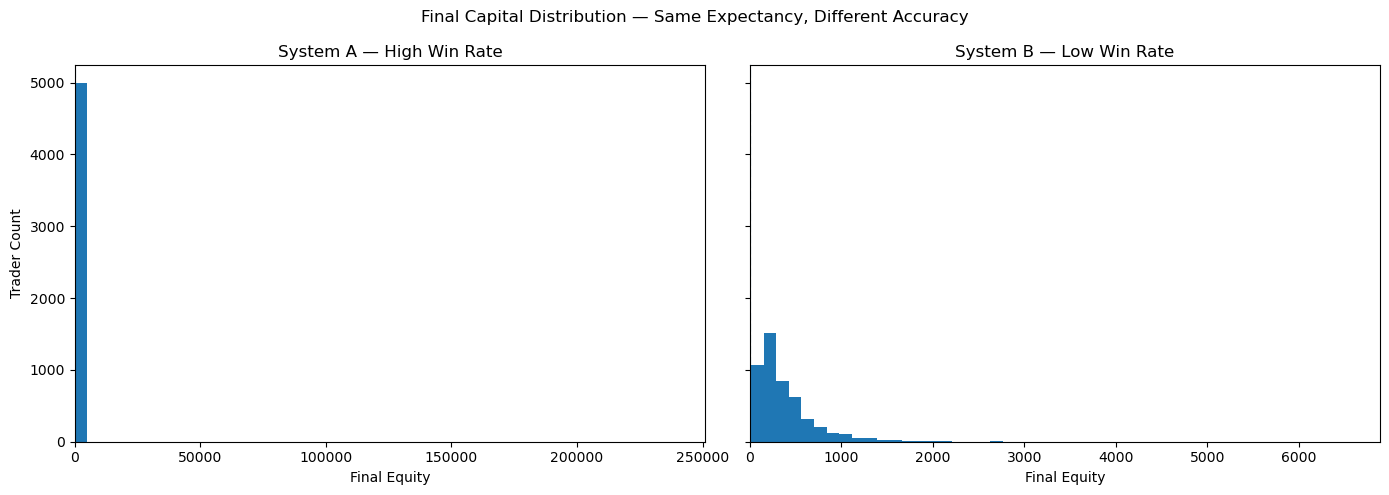

In [6]:
bins = 50
xmin = 0
x1, x2 = (
    np.max(result_A["final_capitals"]),
    np.max(result_B["final_capitals"])
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# System A — High win rate
axes[0].hist(result_A["final_capitals"], bins=bins)
axes[0].axvline(start_capital, linestyle="--")
axes[0].set_title("System A — High Win Rate")
axes[0].set_xlabel("Final Equity")
axes[0].set_ylabel("Trader Count")
axes[0].set_xlim(xmin, x1)

# System B — Low win rate
axes[1].hist(result_B["final_capitals"], bins=bins)
axes[1].axvline(start_capital, linestyle="--")
axes[1].set_title("System B — Low Win Rate")
axes[1].set_xlabel("Final Equity")
axes[1].set_xlim(xmin, x2)

plt.suptitle("Final Capital Distribution — Same Expectancy, Different Accuracy")
plt.tight_layout()
plt.show()



# Observation
### Accuracy Does Not Prevent Ruin
A high win rate does not protect a system from failure.       
System A collapsed despite 90% accuracy because large losses created effective over-leveraging.       
System B survived with lower accuracy because losses were bounded.       

Expectancy determines long-term drift, not survivability.      
Win rate provides emotional comfort, not structural safety.        

Ruin is caused by loss convexity and effective risk per trade — not by being wrong too often.

> *Positive expectancy systems only die through over-leveraging.*